In [1]:
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
# City data
cities = ['Addis Ababa', 'Bahir Dar', 'Gondar', 'Hawassa', 'Mekelle']
roads = {
    'Addis Ababa': [('Bahir Dar', 510), ('Hawassa', 275)],
    'Bahir Dar': [('Addis Ababa', 510), ('Gondar', 180)],
    'Gondar': [('Bahir Dar', 180), ('Mekelle', 300)],
    'Hawassa': [('Addis Ababa', 275)],
    'Mekelle': [('Gondar', 300)]
}

1. Create a visualization of the road network using NetworkX or another library, plotting the graph and highlighting the path found by the agent.

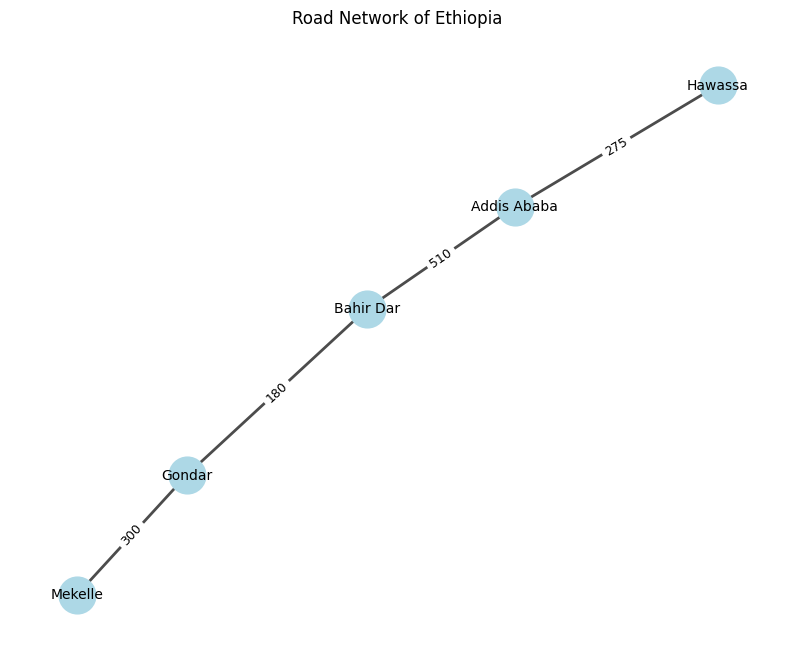

In [4]:
G = nx.Graph()
G.add_nodes_from(cities)

# Add edges (roads with distances)
for city, connections in roads.items():
    for connected_city, distance in connections:
        G.add_edge(city, connected_city, weight=distance)


pos = nx.spring_layout(G)  # Positioning nodes for visualization
plt.figure(figsize=(10, 8))


nx.draw_networkx_nodes(G, pos, node_size=700, node_color="lightblue")
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), width=2, alpha=0.7)
nx.draw_networkx_labels(G, pos, font_size=10, font_color="black")


edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=9)


plt.title("Road Network of Ethiopia")
plt.axis("off")
plt.show()


## Path finding Problem


In [5]:
from collections import deque
import heapq

In [6]:

def uninformed_path_finder(cities, roads, start_city, goal_city, strategy):
    """
    Parameters:
    - cities: List of city names.
    - roads: Dictionary with city connections as {city: [(connected_city, distance)]}.
    - start_city: The city to start the journey.
    - goal_city: The destination city (for specific tasks).
    - strategy: The uninformed search strategy to use ('bfs', 'dfs', 'weighted_bfs').

    Returns:
    - path: List of cities representing the path from start_city to goal_city.
    - cost: Total cost (number of steps or distance) of the path.
    """
    if strategy == 'bfs':

        queue = deque([(start_city, [start_city], 0)])  # (current_city, path, cost)
        visited = set()

        while queue:
            current_city, path, cost = queue.popleft()
            if current_city in visited:
                continue
            visited.add(current_city)

            if current_city == goal_city:
                return path, cost

            for neighbor, distance in roads.get(current_city, []):
                if neighbor not in visited:
                    queue.append((neighbor, path + [neighbor], cost + 1))

    elif strategy == 'dfs':
        # Depth-First Search
        stack = [(start_city, [start_city], 0)]  # (current_city, path, cost)
        visited = set()

        while stack:
            current_city, path, cost = stack.pop()
            if current_city in visited:
                continue
            visited.add(current_city)

            if current_city == goal_city:
                return path, cost

            for neighbor, distance in roads.get(current_city, []):
                if neighbor not in visited:
                    stack.append((neighbor, path + [neighbor], cost + 1))

    elif strategy == 'weighted_bfs':

        priority_queue = [(0, start_city, [start_city])]  # (cost, current_city, path)
        visited = set()

        while priority_queue:
            cost, current_city, path = heapq.heappop(priority_queue)
            if current_city in visited:
                continue
            visited.add(current_city)

            if current_city == goal_city:
                return path, cost

            for neighbor, distance in roads.get(current_city, []):
                if neighbor not in visited:
                    heapq.heappush(priority_queue, (cost + distance, neighbor, path + [neighbor]))

    return None, float('inf')


# Demonstration of the example above


In [8]:
# Example input
cities = ['Addis Ababa', 'Bahir Dar', 'Gondar', 'Hawassa', 'Mekelle']
roads = {
    'Addis Ababa': [('Bahir Dar', 510), ('Hawassa', 275)],
    'Bahir Dar': [('Addis Ababa', 510), ('Gondar', 180)],
    'Gondar': [('Bahir Dar', 180), ('Mekelle', 300)],
    'Hawassa': [('Addis Ababa', 275)],
    'Mekelle': [('Gondar', 300)]
}


path, cost = uninformed_path_finder(cities, roads, 'Addis Ababa', 'Mekelle', 'bfs')
print(f"BFS Path: {path}, Cost: {cost}")


path, cost = uninformed_path_finder(cities, roads, 'Addis Ababa', 'Mekelle', 'dfs')
print(f"DFS Path: {path}, Cost: {cost}")


path, cost = uninformed_path_finder(cities, roads, 'Addis Ababa', 'Mekelle', 'weighted_bfs')
print(f"Weighted BFS Path: {path}, Cost: {cost}")


BFS Path: ['Addis Ababa', 'Bahir Dar', 'Gondar', 'Mekelle'], Cost: 3
DFS Path: ['Addis Ababa', 'Bahir Dar', 'Gondar', 'Mekelle'], Cost: 3
Weighted BFS Path: ['Addis Ababa', 'Bahir Dar', 'Gondar', 'Mekelle'], Cost: 990


## Travel All cities extended


In [9]:
from collections import deque

def traverse_all_cities(cities, roads, start_city, strategy):
    """
    Parameters:
    - cities: List of city names.
    - roads: Dictionary with city connections as {city: [(connected_city, distance)]}.
    - start_city: The city to start the journey.
    - strategy: The uninformed search strategy to use ('bfs' or 'dfs').

    Returns:
    - path: List of cities representing the traversal path.
    - cost: Total cost (distance) of the traversal.
    """
    visited = set()
    path = []
    total_cost = 0

    if strategy == 'bfs':

        queue = deque([(start_city, [start_city], 0)])  # (current_city, path_so_far, current_cost)
        while queue:
            current_city, current_path, current_cost = queue.popleft()
            if current_city in visited:
                continue

            visited.add(current_city)
            path.extend(current_path[-1:])
            total_cost += current_cost

            for neighbor, distance in roads.get(current_city, []):
                if neighbor not in visited:
                    queue.append((neighbor, current_path + [neighbor], distance))

    elif strategy == 'dfs':

        stack = [(start_city, [start_city], 0)]  # (current_city, path_so_far, current_cost)
        while stack:
            current_city, current_path, current_cost = stack.pop()
            if current_city in visited:
                continue

            visited.add(current_city)
            path.extend(current_path[-1:])
            total_cost += current_cost

            for neighbor, distance in roads.get(current_city, []):
                if neighbor not in visited:
                    stack.append((neighbor, current_path + [neighbor], distance))

    return path, total_cost


# Example

In [10]:

cities = ['Addis Ababa', 'Bahir Dar', 'Gondar', 'Hawassa', 'Mekelle']
roads = {
    'Addis Ababa': [('Bahir Dar', 510), ('Hawassa', 275)],
    'Bahir Dar': [('Addis Ababa', 510), ('Gondar', 180)],
    'Gondar': [('Bahir Dar', 180), ('Mekelle', 300)],
    'Hawassa': [('Addis Ababa', 275)],
    'Mekelle': [('Gondar', 300)]
}


bfs_path, bfs_cost = traverse_all_cities(cities, roads, 'Addis Ababa', 'bfs')
print(f"BFS Path: {bfs_path} with cost {bfs_cost}")


dfs_path, dfs_cost = traverse_all_cities(cities, roads, 'Addis Ababa', 'dfs')
print(f"DFS Path: {dfs_path} with cost {dfs_cost}")


BFS Path: ['Addis Ababa', 'Bahir Dar', 'Hawassa', 'Gondar', 'Mekelle'] with cost 1265
DFS Path: ['Addis Ababa', 'Hawassa', 'Bahir Dar', 'Gondar', 'Mekelle'] with cost 1265


## Bonus

## 1. Handling Dynamic Road Conditions (Blocked Roads)

In [12]:
def update_roads(roads, blocked_roads):
    """
    Updates the road graph by removing blocked roads.

    Parameters:
    - roads: Dictionary with city connections as {city: [(connected_city, distance)]}.
    - blocked_roads: List of tuples representing blocked roads [(city1, city2)].

    Returns:
    - updated_roads: Updated dictionary with blocked roads removed.
    """
    updated_roads = {city: list(neighbors) for city, neighbors in roads.items()}

    for city1, city2 in blocked_roads:

        updated_roads[city1] = [(neighbor, dist) for neighbor, dist in updated_roads[city1] if neighbor != city2]
        updated_roads[city2] = [(neighbor, dist) for neighbor, dist in updated_roads[city2] if neighbor != city1]

    return updated_roads


In [13]:

roads = {
    'Addis Ababa': [('Bahir Dar', 510), ('Hawassa', 275)],
    'Bahir Dar': [('Addis Ababa', 510), ('Gondar', 180)],
    'Gondar': [('Bahir Dar', 180), ('Mekelle', 300)],
    'Hawassa': [('Addis Ababa', 275)],
    'Mekelle': [('Gondar', 300)]
}


blocked_roads = [('Addis Ababa', 'Bahir Dar'), ('Gondar', 'Mekelle')]


updated_roads = update_roads(roads, blocked_roads)
print(updated_roads)


{'Addis Ababa': [('Hawassa', 275)], 'Bahir Dar': [('Gondar', 180)], 'Gondar': [('Bahir Dar', 180)], 'Hawassa': [('Addis Ababa', 275)], 'Mekelle': []}


## 2. Finding the k-Shortest Paths Between Two Cities

To find the k-shortest paths, we can use Yen’s Algorithm, which builds upon Dijkstra's algorithm to iteratively find alternative paths.

In [26]:
def k_shortest_paths(cities, roads, start_city, goal_city, k):
    """
    Finds the k-shortest paths between two cities.

    Parameters:
    - cities: List of city names.
    - roads: Dictionary with city connections as {city: [(connected_city, distance)]}.
    - start_city: The starting city.
    - goal_city: The destination city.
    - k: Number of shortest paths to find.

    Returns:
    - paths: List of k paths and their respective costs [(path, cost)].
    """
    def dijkstra(start, end, roads):
        """Helper function to find the shortest path using Dijkstra's algorithm."""
        pq = [(0, start, [])]  # Priority queue: (cost, current_city, path)
        visited = set()

        while pq:
            cost, current_city, path = heapq.heappop(pq)

            if current_city in visited:
                continue
            visited.add(current_city)

            path = path + [current_city]

            if current_city == end:
                return path, cost

            for neighbor, distance in roads.get(current_city, []):
                if neighbor not in visited:
                    heapq.heappush(pq, (cost + distance, neighbor, path))

        return None, float('inf')

    # Step 1: Find the shortest path
    first_path, first_cost = dijkstra(start_city, goal_city, roads)
    if not first_path:
        return []

    paths = [(first_path, first_cost)]
    potential_paths = []
    unique_paths = {tuple(first_path)}

    # Step 2: Iteratively find alternative paths
    for _ in range(1, k):
        for j in range(len(paths[-1][0]) - 1):
            spur_node = paths[-1][0][j]
            root_path = paths[-1][0][:j + 1]


            temp_roads = {city: list(neighbors) for city, neighbors in roads.items()}
            for path, _ in paths:
                if root_path == path[:j + 1] and j + 1 < len(path):
                    next_city = path[j + 1]

                    temp_roads[spur_node] = [
                        (n, d) for n, d in temp_roads[spur_node] if n != next_city
                    ]

            spur_path, spur_cost = dijkstra(spur_node, goal_city, temp_roads)

            if spur_path:

                full_path = root_path + spur_path[1:]
                full_cost = sum(
                    next(
                        d
                        for n, d in roads[full_path[i]]
                        if n == full_path[i + 1]
                    )
                    for i in range(len(full_path) - 1)
                )


                if tuple(full_path) not in unique_paths:
                    potential_paths.append((full_path, full_cost))
                    unique_paths.add(tuple(full_path))

        if not potential_paths:
            break


        heapq.heapify(potential_paths)
        next_path = heapq.heappop(potential_paths)
        paths.append(next_path)

    return paths


In [25]:
# Input data
cities = ['Addis Ababa', 'Bahir Dar', 'Gondar', 'Hawassa', 'Mekelle']
roads = {
    'Addis Ababa': [('Bahir Dar', 510), ('Hawassa', 275)],
    'Bahir Dar': [('Addis Ababa', 510), ('Gondar', 180)],
    'Gondar': [('Bahir Dar', 180), ('Mekelle', 300)],
    'Hawassa': [('Addis Ababa', 275)],
    'Mekelle': [('Gondar', 300)]
}


k = 3
k_paths = k_shortest_paths(cities, roads, 'Addis Ababa', 'Mekelle', k)
for idx, (path, cost) in enumerate(k_paths, 1):
    print(f"Path {idx}: {path}, Cost: {cost}")


Path 1: ['Addis Ababa', 'Bahir Dar', 'Gondar', 'Mekelle'], Cost: 990
